In [105]:
import numpy as np
import matplotlib.pyplot as plt

from diffusion_map import DiffusionMap
from datafold.utils.plot import plot_pairwise_eigenvector
from dataset import Dataset

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
def plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, time):
    """
    Plot different graphs with respect to selected part.
    """
    print(f"{sample} Largest eigenvalues with respect this dataset: \n {evals}")
    idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

    if part == 1:
        fig = plt.figure(figsize=(15, 7))
        plot = 0
        for evec in evecs.T:    
            plot += 1 
            ax  = fig.add_subplot(int(str(int(sample / 3 + 1)) +"3" + str(plot)))
            ax.scatter(time[idx_plot], evec[idx_plot], c=time[idx_plot])
            ax.set_xlabel("time")
            ax.set_ylabel(f"eigenvector {plot}")
        fig.suptitle(f"Eigenfunctions with respect to time, {nr_samples_plot} from {nr_samples} points.")
    elif part == 2 or part == 4:
        plot_pairwise_eigenvector(
            eigenvectors=evecs[idx_plot, :],
            n=1,
            fig_params=dict(figsize=[15, 7]),
            scatter_params=dict(cmap=plt.cm.Spectral, c=time[idx_plot]),
        ) 
    elif part == 3:
        plot_pairwise_eigenvector(
            eigenvectors=evecs,
            n=1,
            fig_params=dict(figsize=[15, 7])
        )
    plt.show()


### Part 1: Periodic Data Set

In [51]:
part = 1
nr_samples = 1000        # Number of samples
nr_samples_plot = 100    # Number of samples to plot
sample = 5               # L+1 largest eigenfunctions
radius = 0.5             # Radius around a point for distance computation

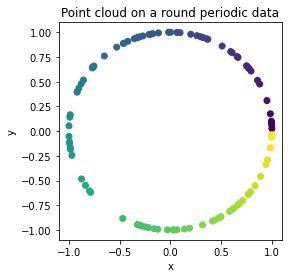

In [52]:
dataset = Dataset(nr_samples, nr_samples_plot)
positions, time = dataset.generate_periodic_data()

# Plot the point cloud with respect to time
dataset.plot_periodic_data(positions, time)

5 Largest eigenvalues with respect this dataset: 
 [1.         0.82889099 0.82877265 0.46891336 0.46805424 0.17695653]


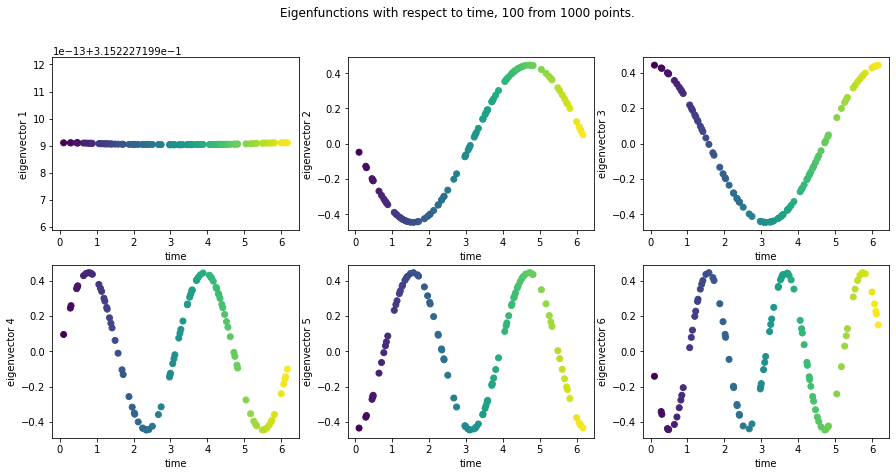

In [53]:
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions(positions, sample, radius)

# Plot the eigenfunctions with respect to time
plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, time)

### Part 2: Swiss roll data set

In [56]:
part = 2
nr_samples = 5000        # Number of samples
nr_samples_plot = 1000   # Number of samples to plot
sample = 10              # L+1 largest eigenfunctions
radius = 5               # Radius around a point for distance computation

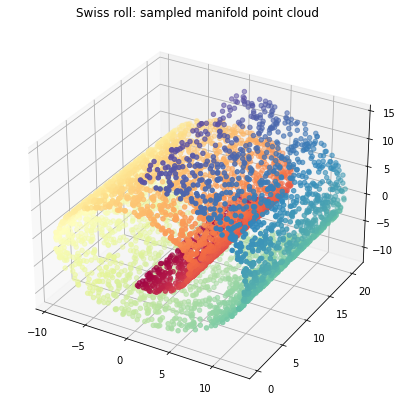

In [58]:
dataset = Dataset(nr_samples, nr_samples_plot)
positions, positions_color = dataset.generate_swiss_roll()
dataset.plot_swiss_roll(positions, positions_color)


10 Largest eigenvalues with respect this dataset: 
 [1.         0.99969959 0.99880157 0.99725382 0.99513498 0.99493661
 0.99464852 0.99372012 0.99241935 0.99216986 0.9901742 ]


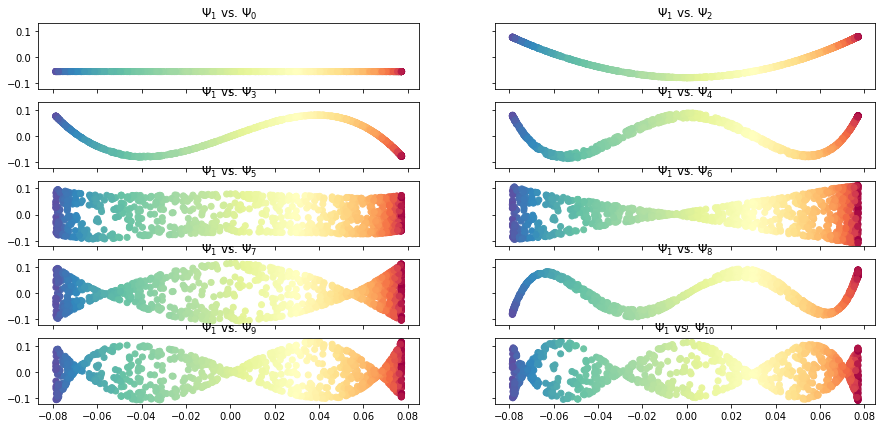

In [59]:
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions(positions, sample, radius)

# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)

#### Compute three principal components

In [112]:
import os, sys

path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
file = parent + "/PCA"

sys.path.insert(1, file)

from pca import pca

In [128]:
U, S, Vh, energy = pca(positions)

S[3:, 3:] = 0
energy = np.sum(energy[:3])
energy_loss = (1 - energy)

positions_reconstructed = (U @ S @ Vh) + positions.mean(axis=0)

print(energy)

1.0


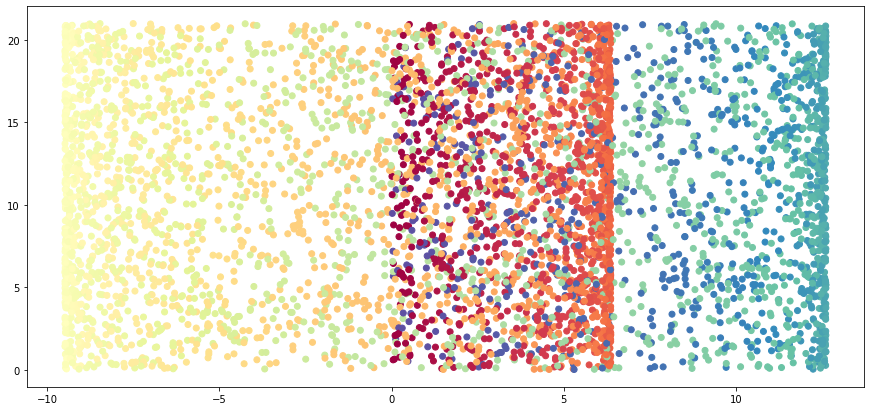

In [129]:
fig = plt.figure(figsize=(15, 7))
ax  = fig.add_subplot()
plt.scatter(positions_reconstructed[:,0], positions_reconstructed[:,1], c=positions_color, cmap=plt.cm.Spectral)

#### Compute two principal components

In [130]:
U, S, Vh, energy = pca(positions)

S[2:, 2:] = 0
energy = np.sum(energy[:2])
energy_loss = (1 - energy)

positions_reconstructed = (U @ S @ Vh) + positions.mean(axis=0)

print(energy)

0.7155568042504779


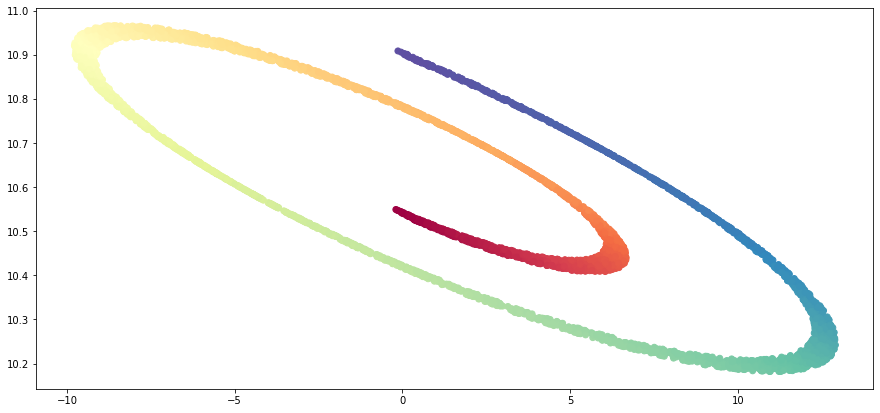

In [131]:
fig = plt.figure(figsize=(15, 7))
ax  = fig.add_subplot()
plt.scatter(positions_reconstructed[:,0], positions_reconstructed[:,1], c=positions_color, cmap=plt.cm.Spectral)

### Part 3: Pedestrian trajectory data set

In [60]:
part = 3
sample = 10              # L+1 largest eigenfunctions

Text(0.5, 0.98, 'Trajectory of the first two pedestrians')

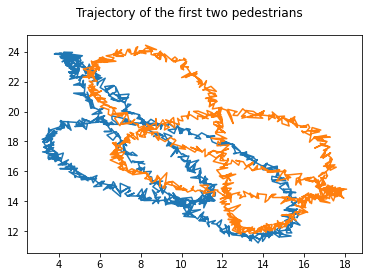

In [61]:
positions = np.loadtxt("data_DMAP_PCA_vadere.txt", dtype=float)

# Plot first 2 pedestrians
fig = plt.figure()
ax = plt.axes()
ax.plot(positions[:,0], positions[:,1]);   # plot pedestrian 1
ax.plot(positions[:,2], positions[:,3]);   # plot pedestrian 2
fig.suptitle(f"Trajectory of the first two pedestrians")


10 Largest eigenvalues with respect this dataset: 
 [1.         0.99982775 0.99982617 0.99931018 0.9993045  0.99846499
 0.99841976 0.99724399 0.9972218  0.99571435 0.99564481]


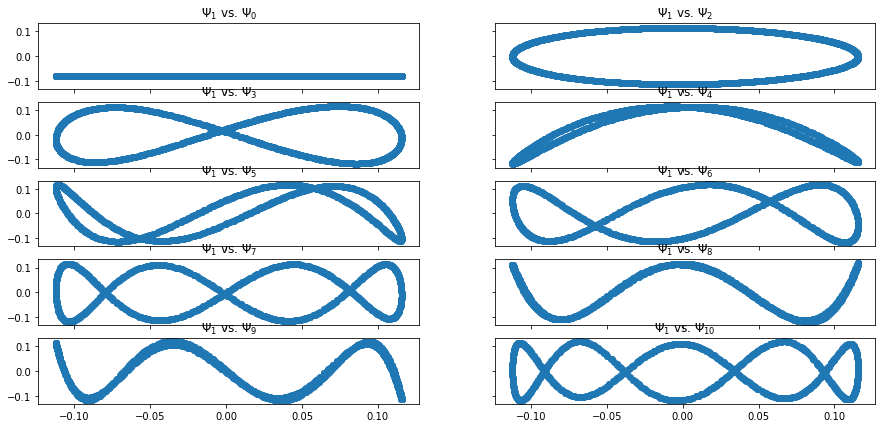

In [62]:
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions(positions, sample, radius)

plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, None)

## Part 4: Using Data fold for swiss-roll Data set

In [63]:
part = 4
nr_samples = 5000        # Number of samples
nr_samples_plot = 1000   # Number of samples to plot
sample = 10              # L+1 largest eigenfunctions
radius = 5               # Radius around a point for distance computation

10 Largest eigenvalues with respect this dataset: 
 [1.         0.99968395 0.99871892 0.99715837 0.9949062  0.99474997
 0.99419013 0.99336276 0.99222812 0.99178034]


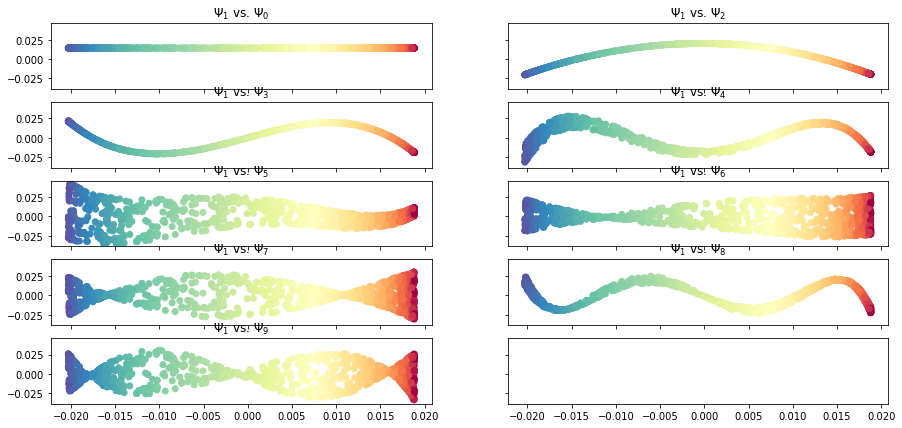

In [64]:
dataset = Dataset(nr_samples, nr_samples_plot)
positions, positions_color = dataset.generate_swiss_roll()
dmap = DiffusionMap()
evecs, evals = dmap.compute_eigenfunctions_datafold(positions, sample)

# Plot the eigenfunction phi_1 with respect to the others
plot_eigenfunctions(sample, nr_samples, nr_samples_plot, part, evecs, evals, positions_color)